<a href="https://colab.research.google.com/github/Ferchisx/EjerciciosSyS/blob/Ejercicios/Parcial2/Punto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-11-09 21:03:55--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 173.194.213.113, 173.194.213.100, 173.194.213.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.213.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/31tk695251qaehim37qem904opchqno6/1699563825000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=6db83df6-4d48-4b43-9874-db50e1644ca0 [following]
--2023-11-09 21:03:55--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/31tk695251qaehim37qem904opchqno6/1699563825000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=6db83df6-4d48-4b43-9874-db50e1644ca0
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 142.250.97.1

In [2]:
# @title Instalación de librerias

import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
datos = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(datos)

In [3]:
# @title Obtencion de datos
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR',
           'IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [4]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape},Ytest {Ytest.shape}")
np.unique(Ytrain)

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000),Ytest (360,)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

Graficamos las señales en el tiempo:

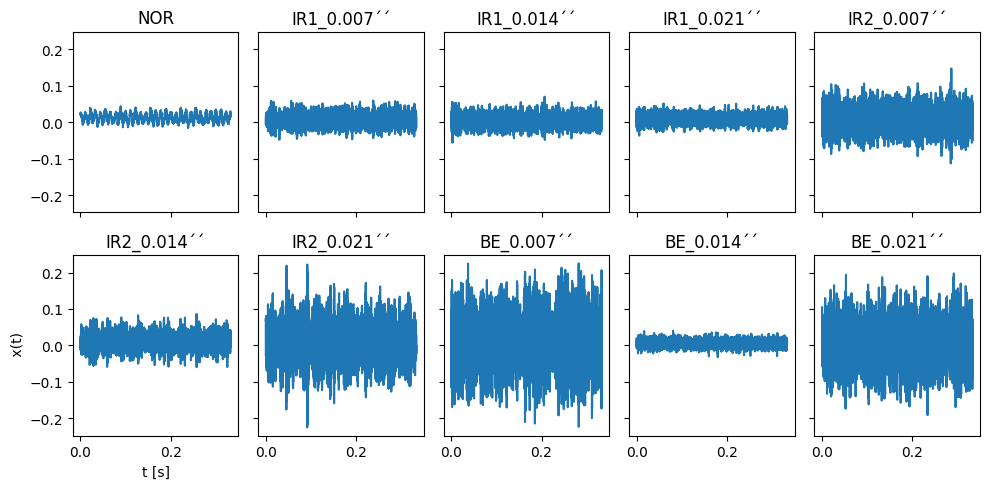

In [6]:
nrows = 2
ncols = 5

#grafica en el tiempo señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(tv,Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('t [s]')
ax[1,0].set_ylabel(' x(t)')
plt.tight_layout()
plt.show()

Hallamos las transformadas necesarias:

In [7]:
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #vector frecuencias

Xw = abs(np.fft.rfft(Xtrain)) # FFT de train
Xw2 = abs(np.fft.rfft(Xtest)) # FFT de test

Realizamos un análisis de las señales en el mapa 2D, para facilitar el cálculo de las distancias entre Xtrain y Xtest. Se realiza el escalamiento para ambos vectores para no entrar en errores.

In [8]:
sca_ = MinMaxScaler()

Xw_ = sca_.fit_transform(Xw.T).T
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

Xw_2 = sca_.fit_transform(Xw2.T).T
red = PCA(n_components=2)
Z2 = red.fit_transform(Xw_2)

Graficamos las señales en frecuencia:

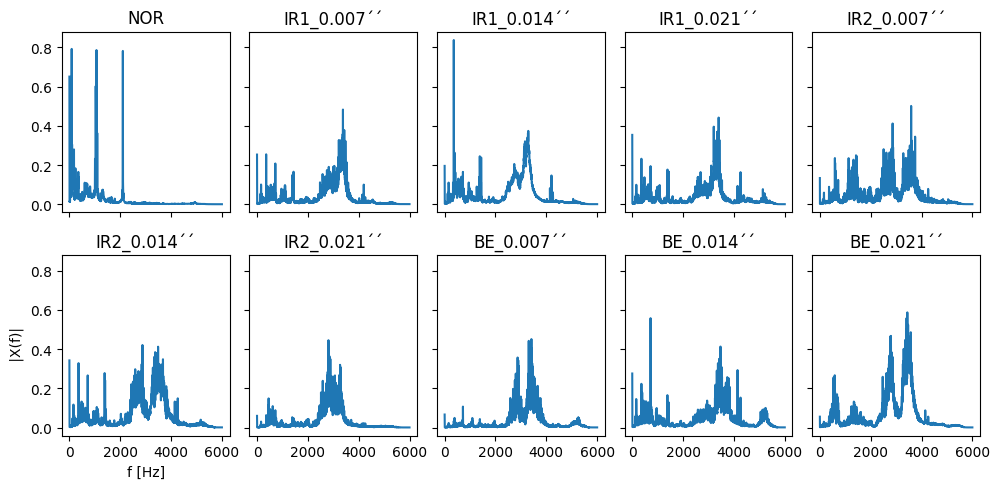

In [9]:
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(vf,abs(Xw_[Ytrain==ncols*i+j+1]).mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('f [Hz]')
ax[1,0].set_ylabel(' |X(f)|')
plt.tight_layout()
plt.show()

In [11]:
from scipy.spatial.distance import cdist

Dtr_te = cdist(Xw_,Xw_2)
Dtr_te.shape #distancias espectros Xtrain vs Xtest

(840, 360)